In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('train_telecom.csv')
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [5]:

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [6]:
data.sample(10) # смотрим на случайные строчки

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
928,22,69.50,1498.2,Female,0,Yes,Yes,Yes,No,DSL,No,Yes,No,No,Yes,Yes,One year,Yes,Bank transfer (automatic),1
2978,7,74.85,485.25,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0
4363,17,83.55,1329.15,Female,0,No,No,Yes,No,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,0
4695,45,103.65,4747.85,Male,0,No,No,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),0
202,6,20.70,112.75,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
462,4,89.60,365.65,Female,0,No,Yes,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,No,Mailed check,1
2521,1,70.00,70,Male,0,Yes,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Electronic check,1
1768,27,20.10,562.6,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),0
2209,10,86.65,856.65,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,1
2640,26,45.45,1233.15,Male,0,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Electronic check,0


In [7]:
data.shape # смотрим размерность датасета

(5282, 20)

In [8]:
data.dtypes # смотрим на типы данных датасета

ClientPeriod                  int64
MonthlySpending             float64
TotalSpent                   object
Sex                          object
IsSeniorCitizen               int64
HasPartner                   object
HasChild                     object
HasPhoneService              object
HasMultiplePhoneNumbers      object
HasInternetService           object
HasOnlineSecurityService     object
HasOnlineBackup              object
HasDeviceProtection          object
HasTechSupportAccess         object
HasOnlineTV                  object
HasMovieSubscription         object
HasContractPhone             object
IsBillingPaperless           object
PaymentMethod                object
Churn                         int64
dtype: object

In [9]:
data.isna().sum() # смотрим на количество наллов в каждой фиче

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [14]:
# конвертируем фичу TotalSpent из object во float
data['TotalSpent'] = data['TotalSpent'].apply(lambda x: float(x) if x.isdigit() else np.nan) 
data.dtypes

ClientPeriod                  int64
MonthlySpending             float64
TotalSpent                  float64
Sex                          object
IsSeniorCitizen               int64
HasPartner                   object
HasChild                     object
HasPhoneService              object
HasMultiplePhoneNumbers      object
HasInternetService           object
HasOnlineSecurityService     object
HasOnlineBackup              object
HasDeviceProtection          object
HasTechSupportAccess         object
HasOnlineTV                  object
HasMovieSubscription         object
HasContractPhone             object
IsBillingPaperless           object
PaymentMethod                object
Churn                         int64
dtype: object

In [15]:
data.isna().sum()

ClientPeriod                   0
MonthlySpending                0
TotalSpent                  5043
Sex                            0
IsSeniorCitizen                0
HasPartner                     0
HasChild                       0
HasPhoneService                0
HasMultiplePhoneNumbers        0
HasInternetService             0
HasOnlineSecurityService       0
HasOnlineBackup                0
HasDeviceProtection            0
HasTechSupportAccess           0
HasOnlineTV                    0
HasMovieSubscription           0
HasContractPhone               0
IsBillingPaperless             0
PaymentMethod                  0
Churn                          0
dtype: int64

In [17]:
new_data = data.interpolate(method='linear', axis=0).copy() # интерполируем проспуски в TotalSpent
new_data.sample(10)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
4444,1,70.30,5630.528571,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,1
4528,34,88.85,6562.377049,Male,0,Yes,No,Yes,Yes,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,No,Mailed check,0
326,1,79.35,862.000000,Female,0,Yes,No,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),1
3738,65,104.35,2456.681818,Male,1,Yes,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,0
5060,17,65.75,3195.527273,Male,0,No,No,Yes,Yes,DSL,Yes,No,No,No,No,Yes,Month-to-month,No,Bank transfer (automatic),0
2691,12,45.90,2697.800000,Female,0,Yes,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),0
4420,1,19.30,3512.392857,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),0
5102,68,113.15,7856.000000,Male,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,1
346,10,78.15,1242.000000,Female,0,Yes,No,Yes,Yes,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0
397,15,101.10,4915.200000,Male,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,1


In [18]:
new_data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  3
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [20]:
new_data = new_data.dropna() # удаляем оставшиеся пропуски
new_data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [63]:
import seaborn as sns

Смотрим на распределение численных признаков

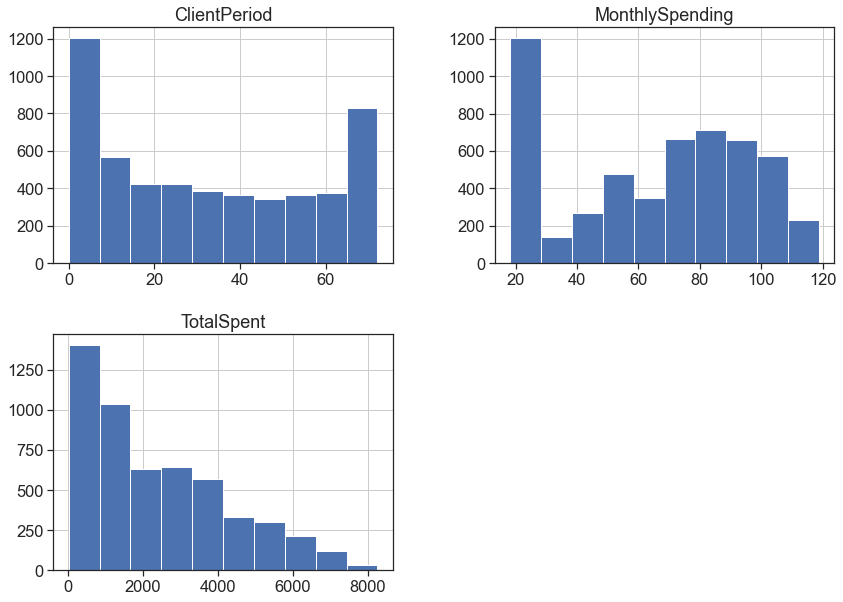

In [66]:
new_data.hist(column=num_cols, figsize=(14,10));

Смотрим на распределение категориальных признаков

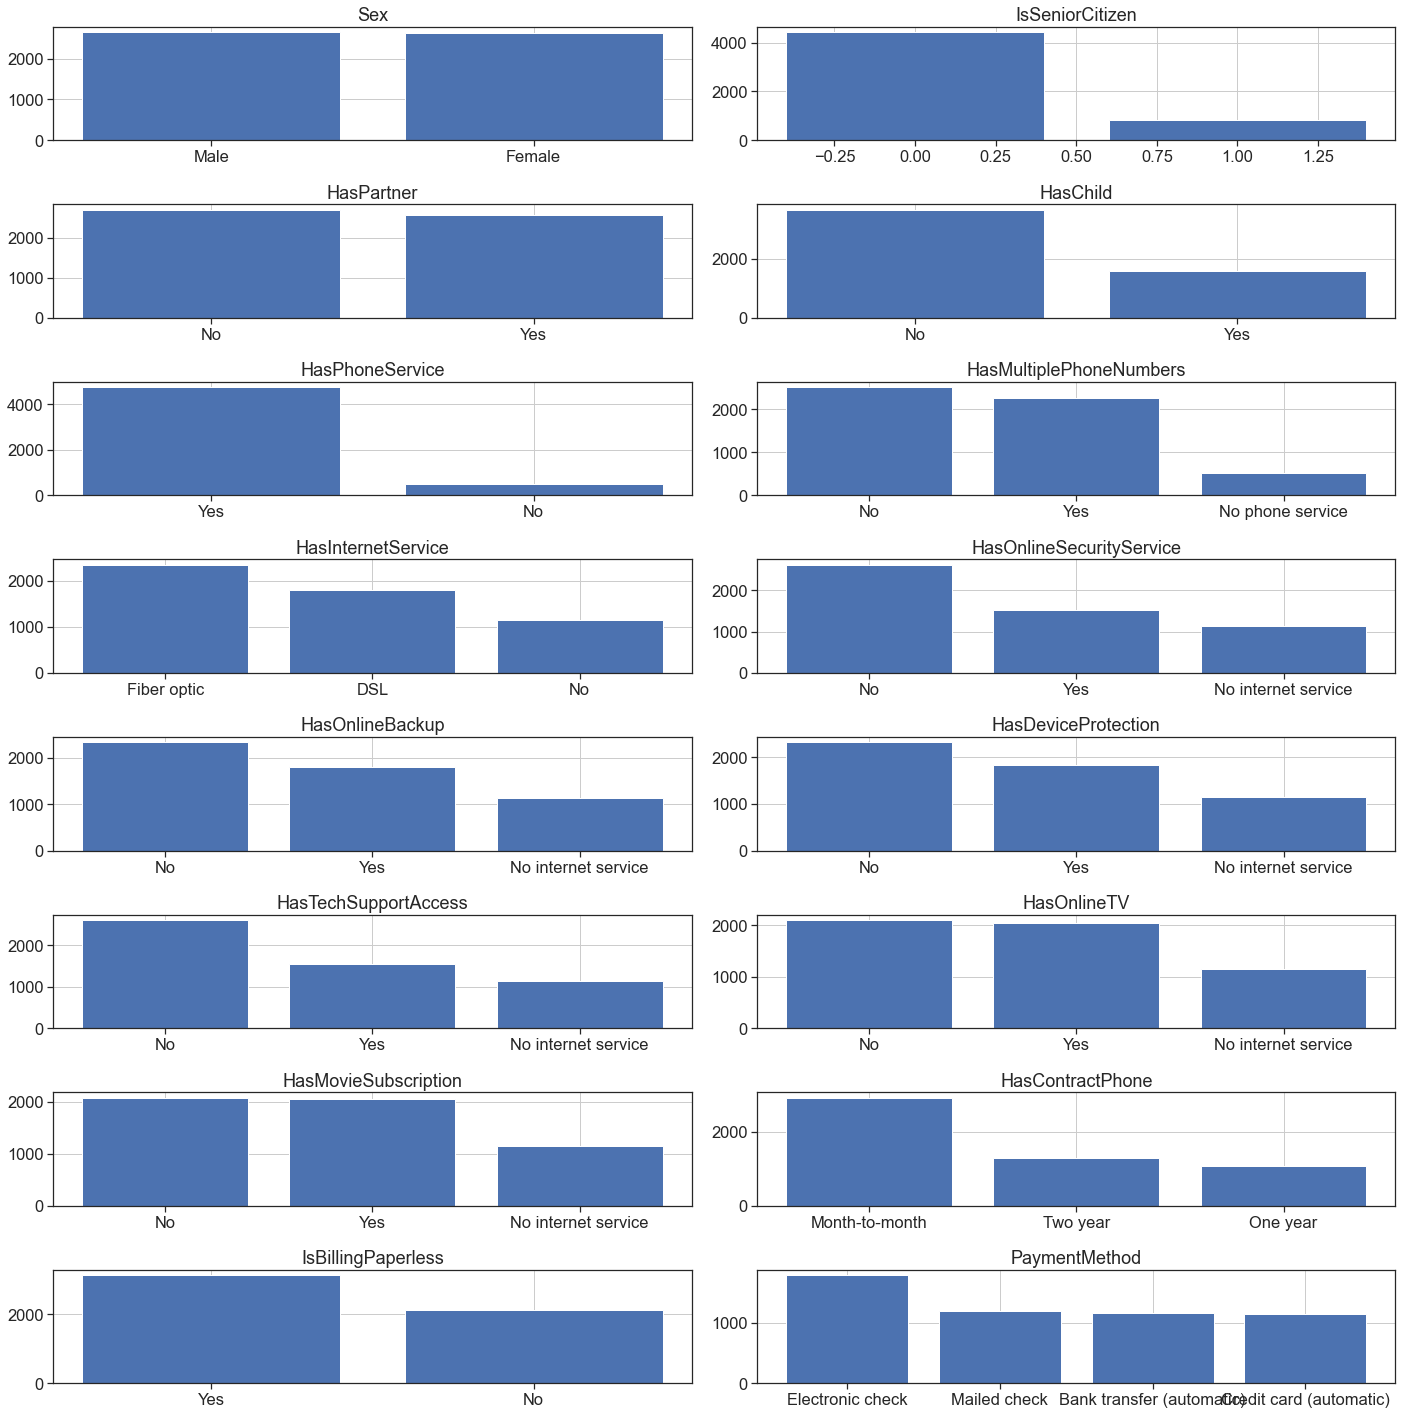

In [65]:
fig, ax = plt.subplots(len(cat_cols) // 2, 2, figsize=(20,20))
ax = ax.ravel()
sns.set_style("ticks",{'axes.grid' : True})
for i, col in enumerate(cat_cols):
    values = new_data[col].value_counts()
    ax[i].set_title(col)
    ax[i].bar(x=values.index, height=values.values)
fig.tight_layout()

Смотрим на корреляции между признаками

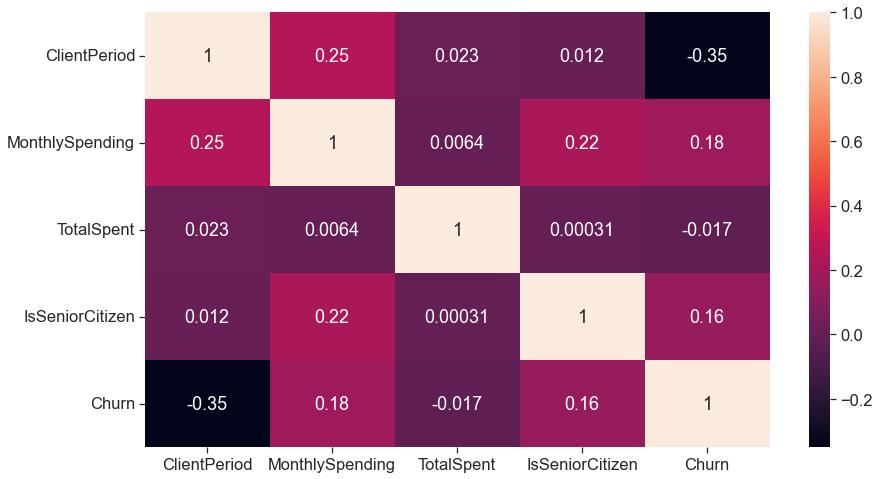

In [115]:
plt.figure(figsize=(14, 8))
heatmap = sns.heatmap(new_data.corr(), annot=True);

Смотрим на распределение целевой переменной

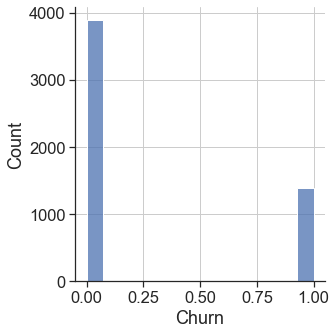

In [69]:
sns.displot(x=new_data[target_col]);

In [73]:
target_frequency = new_data[target_col].value_counts(normalize=True)
target_frequency

0    0.738019
1    0.261981
Name: Churn, dtype: float64

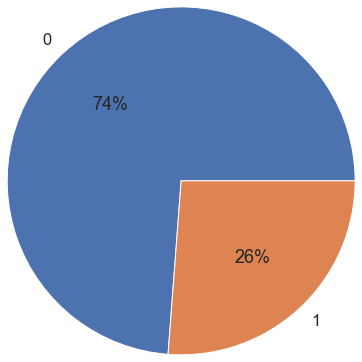

In [76]:
plt.pie(x=target_frequency.values, labels=target_frequency.index, autopct='%.0f%%',radius=2);

Вывод: классы нельзя назвать несбалансированными

In [28]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline

In [99]:
X = new_data.iloc[:,:-1].copy()
X.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
3,32,79.30,2570.000000,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check
4,60,115.25,2456.473684,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic)
5,25,19.80,2342.947368,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic)
6,27,90.15,2229.421053,Female,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,No,Bank transfer (automatic)
7,1,45.70,2115.894737,Male,0,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check


In [100]:
y = new_data[target_col]
y

3       0
4       0
5       0
6       0
7       1
       ..
5277    0
5278    0
5279    0
5280    0
5281    0
Name: Churn, Length: 5279, dtype: int64

In [43]:
categorial_data = new_data[cat_cols]
numeric_data = new_data[num_cols]

Сделаем One-Hot кодирование

In [44]:
dummy_features = pd.get_dummies(categorial_data)

In [46]:
X = pd.concat([numeric_data, dummy_features], axis=1)
X_origin = new_data.iloc[:, :-1]
X.head()

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3,32,79.30,2570.000000,1,1,0,0,1,1,0,...,0,1,0,0,1,0,0,0,0,1
4,60,115.25,2456.473684,0,1,0,0,1,0,1,...,1,0,0,1,1,0,0,1,0,0
5,25,19.80,2342.947368,0,1,0,1,0,1,0,...,0,0,0,1,1,0,0,1,0,0
6,27,90.15,2229.421053,0,1,0,0,1,1,0,...,1,1,0,0,1,0,1,0,0,0
7,1,45.70,2115.894737,0,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1


In [47]:
X.shape

(5279, 45)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Сделаем стандартизацию

In [70]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Сделаем кросс-валидацию

In [71]:
grid_search_cv = GridSearchCV(LogisticRegression(),
                              {'C':[100, 10, 1, 0.1, 0.01, 0.001]},
                              cv=5,
                              scoring='roc_auc',
                              refit=True)
grid_search_cv.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1, 0.1, 0.01, 0.001]},
             scoring='roc_auc')

In [72]:
grid_search_cv.best_score_

0.8411414170506912

In [74]:
grid_search_cv.best_params_

{'C': 0.1}

In [75]:
predictions = grid_search_cv.predict_proba(X_test_scaled)[:,1]

In [76]:
roc_auc_score(y_test, predictions)

0.846115191341322

Лучшее качество: 0.846115191341322 при С = 0.1

In [68]:
import catboost

In [82]:
X_train_origin, X_test_origin, _, _ = train_test_split(X_origin, y, 
                                                       train_size=0.8, 
                                                    random_state=42)

In [83]:
boosting_model = catboost.CatBoostClassifier(cat_features=cat_cols)
boosting_model.fit(X_train_origin, y_train)

y_train_predicted = boosting_model.predict_proba(X_train_origin)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_test_origin)[:, 1]

Learning rate set to 0.019058
0:	learn: 0.6818131	total: 301ms	remaining: 5m 1s
1:	learn: 0.6712923	total: 388ms	remaining: 3m 13s
2:	learn: 0.6610229	total: 504ms	remaining: 2m 47s
3:	learn: 0.6524017	total: 594ms	remaining: 2m 27s
4:	learn: 0.6439527	total: 685ms	remaining: 2m 16s
5:	learn: 0.6347405	total: 792ms	remaining: 2m 11s
6:	learn: 0.6266453	total: 958ms	remaining: 2m 15s
7:	learn: 0.6180930	total: 1.19s	remaining: 2m 27s
8:	learn: 0.6102816	total: 1.37s	remaining: 2m 30s
9:	learn: 0.6011321	total: 1.57s	remaining: 2m 35s
10:	learn: 0.5927713	total: 1.69s	remaining: 2m 32s
11:	learn: 0.5857229	total: 1.83s	remaining: 2m 30s
12:	learn: 0.5782516	total: 1.96s	remaining: 2m 28s
13:	learn: 0.5717171	total: 2.02s	remaining: 2m 22s
14:	learn: 0.5647092	total: 2.19s	remaining: 2m 23s
15:	learn: 0.5578391	total: 2.4s	remaining: 2m 27s
16:	learn: 0.5517069	total: 2.5s	remaining: 2m 24s
17:	learn: 0.5460050	total: 2.58s	remaining: 2m 20s
18:	learn: 0.5402691	total: 2.69s	remaining: 2m

In [84]:
train_roc = roc_auc_score(y_train, y_train_predicted)
train_roc

0.9018817683049435

In [85]:
test_roc = roc_auc_score(y_test, y_test_predicted)
test_roc

0.8464534209509084

In [89]:
params_grid = {'iterations': [400, 500, 600],
               'learning_rate' : [0.01, 0.05, 0.1, 0.25]}
grid_search_model = GridSearchCV(catboost.CatBoostClassifier(cat_features=cat_cols),
                                 params_grid,
                                 cv=3,
                                 scoring='roc_auc',
                                 refit=True)
grid_search_model.fit(X_train_origin, y_train)
grid_search_model.best_score_
y_train_grid_predicted = grid_search_model.predict_proba(X_train_origin)[:, 1]
y_test_grid_predicted = grid_search_model.predict_proba(X_test_origin)[:, 1]

0:	learn: 0.6862081	total: 159ms	remaining: 1m 3s
1:	learn: 0.6802639	total: 202ms	remaining: 40.2s
2:	learn: 0.6739243	total: 271ms	remaining: 35.8s
3:	learn: 0.6676369	total: 328ms	remaining: 32.5s
4:	learn: 0.6617035	total: 404ms	remaining: 31.9s
5:	learn: 0.6556977	total: 463ms	remaining: 30.4s
6:	learn: 0.6500466	total: 525ms	remaining: 29.5s
7:	learn: 0.6447579	total: 587ms	remaining: 28.8s
8:	learn: 0.6394419	total: 690ms	remaining: 30s
9:	learn: 0.6347168	total: 738ms	remaining: 28.8s
10:	learn: 0.6291733	total: 820ms	remaining: 29s
11:	learn: 0.6236395	total: 923ms	remaining: 29.9s
12:	learn: 0.6186318	total: 1s	remaining: 29.8s
13:	learn: 0.6141007	total: 1.05s	remaining: 29.1s
14:	learn: 0.6096538	total: 1.11s	remaining: 28.5s
15:	learn: 0.6051623	total: 1.22s	remaining: 29.2s
16:	learn: 0.6012314	total: 1.26s	remaining: 28.4s
17:	learn: 0.5966678	total: 1.32s	remaining: 28s
18:	learn: 0.5920960	total: 1.38s	remaining: 27.6s
19:	learn: 0.5882515	total: 1.47s	remaining: 27.9s

In [90]:
grid_search_model.best_score_

0.845709283920706

In [92]:
train_roc_grid = roc_auc_score(y_train, y_train_grid_predicted)
train_roc_grid

0.8682230775859594

In [93]:
test_roc_grid = roc_auc_score(y_test, y_test_grid_predicted)
test_roc_grid

0.8513529184383455

Лучшее качество на тестовой выборке: 0.8464534209509084 при стандартных iterations и learning_rate

# Предсказания

In [94]:
best_model = boosting_model

In [97]:
X_test = pd.read_csv('test.csv')
submission = pd.read_csv('submission.csv')
submission['Churn'] = best_model.predict_proba(X_test)[:,1] 
submission.to_csv('my_submission_1.csv', sep=',', index=False)